In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import patches as mpatches
import matplotlib.cm as cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth
import cfgrib
import os

In [2]:
path_w1 = '/glade/u/home/sakor/work/CREDIT/wx_former_1h/2021-02-14T00Z/pred_2021-02-14T00Z_006.nc'
xr.open_dataset(path_w1).height_agl

<xarray.DataArray 'height_agl' (height_agl: 21)> Size: 168B
array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000., 2250.,
       2500., 2750., 3000., 3250., 3500., 3750., 4000., 4250., 4500., 4750.,
       5000.])
Coordinates:
  * height_agl  (height_agl) float64 168B 0.0 250.0 500.0 ... 4.75e+03 5e+03

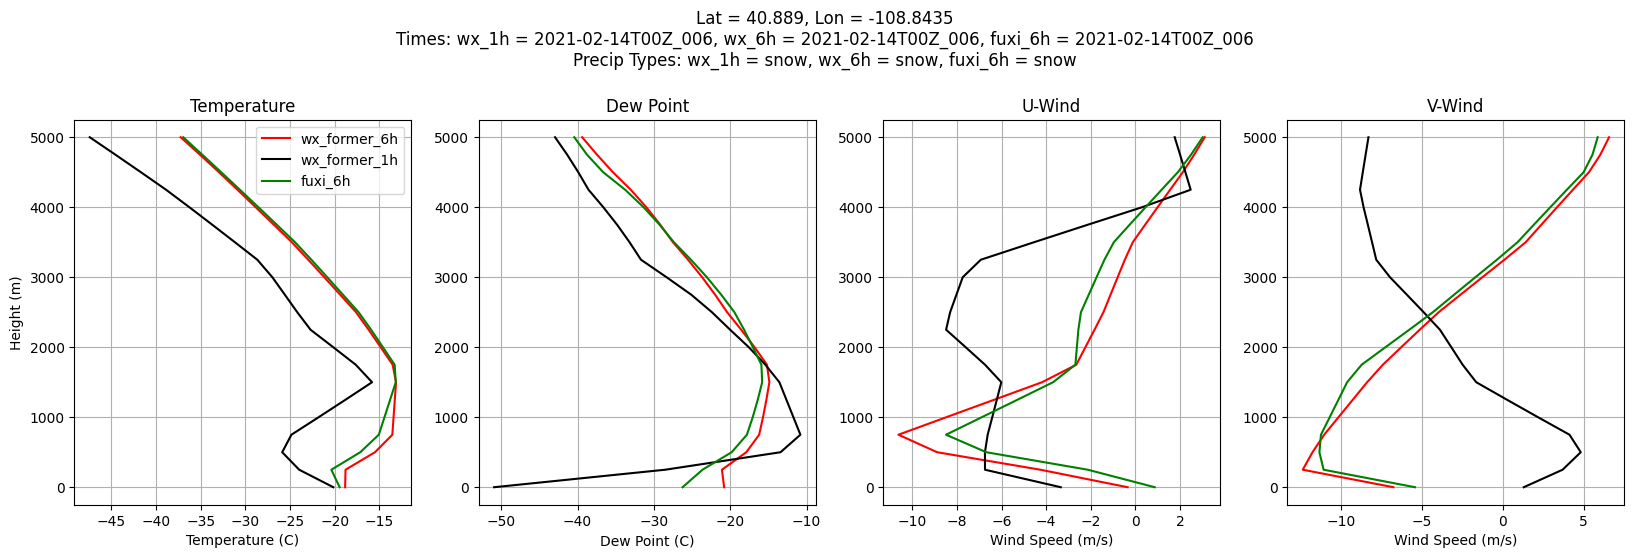

In [3]:
def plot_profiles(path_w1, path_w6, path_f6, lat=40.889, lon=-108.8435):
    """
    Create a 1-row, 4-column subplot of temperature, dew point, u-wind, and v-wind profiles.
    
    Parameters:
    - path_w1: Path to wx_former_1h netCDF file
    - path_w6: Path to wx_former_6h netCDF file
    - path_f6: Path to fuxi_6h netCDF file
    - lat: Latitude coordinate (default: 40.889)
    - lon: Longitude coordinate (default: -108.8435)
    """
    def get_points(path, lat, lon):
        data = xr.open_dataset(path)
        data = data.assign_coords(longitude=((data.longitude + 180) % 360) - 180)
        data = data.sortby(['latitude', 'longitude'])
        return data.sel(latitude=lat, longitude=lon, method='nearest')

    def get_type(data):
        ptype = None
        types = ['ML_crain', 'ML_csnow','ML_cfrzr','ML_cicep']
        for typ in types:
            if data[typ] == 1:
                ptype = typ[4:]
        return ptype
    
    def get_time_from_path(path):
        """Extract time information from filename"""
        filename = os.path.basename(path)
        time_str = filename.split('pred_')[-1].split('.nc')[0]
        return time_str
    
    # Get data for all three models
    wx_6h = get_points(path_w6, lat, lon)
    wx_1h = get_points(path_w1, lat, lon)
    fuxi_6h = get_points(path_f6, lat, lon)
    
    time_w1 = get_time_from_path(path_w1)
    time_w6 = get_time_from_path(path_w6)
    time_f6 = get_time_from_path(path_f6)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    variables = ['T_HEIGHT','DPT_HEIGHT','U_HEIGHT','V_HEIGHT']
    titles = ['Temperature', 'Dew Point', 'U-Wind', 'V-Wind']
    xlabels = ['Temperature (C)', 'Dew Point (C)', 'Wind Speed (m/s)', 'Wind Speed (m/s)']
    
    for i, (var, title, xlabel) in enumerate(zip(variables, titles, xlabels)):
        ax = axes[i]
        ax.plot(wx_6h[var].isel(time=0).values, wx_6h['height_agl'].values, 
                label='wx_former_6h', color='red')
        ax.plot(wx_1h[var].isel(time=0).values, wx_1h['height_agl'].values, 
                label='wx_former_1h', color='black')
        ax.plot(fuxi_6h[var].isel(time=0).values, fuxi_6h['height_agl'].values, 
                label='fuxi_6h', color='green')
        
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.grid()
        
        
        if i == 0:
            ax.set_ylabel('Height (m)')
            ax.legend()
    
    fig.suptitle(
        f'Lat = {lat}, Lon = {lon}\n'
        f'Times: wx_1h = {time_w1}, wx_6h = {time_w6}, fuxi_6h = {time_f6}\n'
        f'Precip Types: wx_1h = {get_type(wx_1h)}, wx_6h = {get_type(wx_6h)}, fuxi_6h = {get_type(fuxi_6h)}',
        y=1.1,  # Slightly higher to accommodate extra line
        fontsize=12
    )
    # fig.savefig('ptype.pdf')
    return fig


path_w1 = '/glade/u/home/sakor/work/CREDIT/wx_former_1h/2021-02-14T00Z/pred_2021-02-14T00Z_006.nc'
path_w6 = '/glade/u/home/sakor/work/CREDIT/wx_former_6h/2021-02-14T00Z/pred_2021-02-14T00Z_006.nc'
path_f6 = '/glade/u/home/sakor/work/CREDIT/fuxi_6h/2021-02-14T00Z/pred_2021-02-14T00Z_006.nc'
fig = plot_profiles(path_w1, path_w6, path_f6)
plt.show()

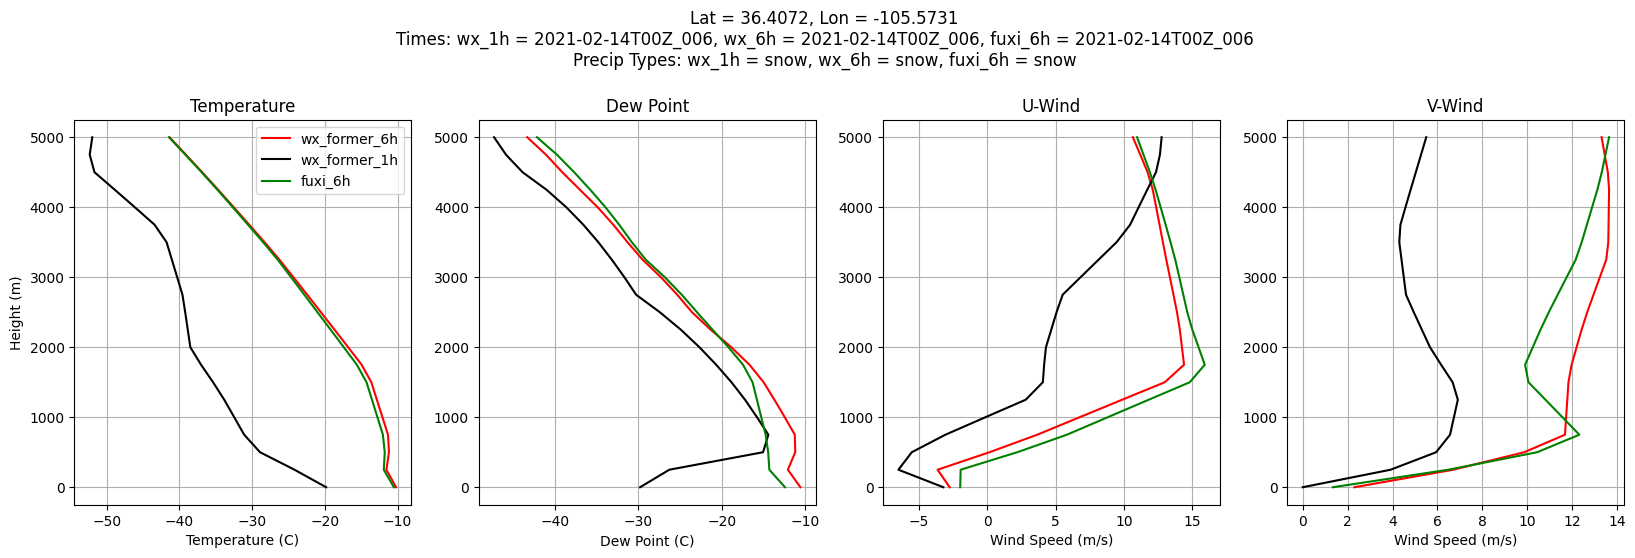

In [4]:
Lat=  36.4072 # New mexico
Lon= -105.5731
fig = plot_profiles(path_w1, path_w6, path_f6,lat = Lat, lon= Lon)
plt.show()

In [5]:
def get_points(path, lat=40.889, lon=-108.8435):
    data = xr.open_dataset(path)
    data = data.assign_coords(longitude=((data.longitude + 180) % 360) - 180)
    data = data.sortby(['latitude', 'longitude'])
    return data.sel(latitude=lat, longitude=lon, method='nearest')

path_w1 = '/glade/u/home/sakor/work/CREDIT/wx_former_1h/2021-02-14T12Z/pred_2021-02-14T12Z_006.nc'   
# Get data for all three models
wx_1h = get_points(path_w1)

In [6]:
wx_1h.isel(time=0)['Q_HEIGHT'].values

array([9.7788870e-09, 3.3854856e-04, 1.2414783e-03, 1.5302656e-03,
       1.4312405e-03, 1.3325921e-03, 1.2343029e-03, 1.1596902e-03,
       1.0965256e-03, 1.0330963e-03, 9.0835575e-04, 7.2933477e-04,
       5.5056595e-04, 3.7201817e-04, 2.8530005e-04, 2.7039435e-04,
       2.5533044e-04, 2.4010289e-04, 2.2482430e-04, 2.1347246e-04,
       2.0201254e-04], dtype=float32)

In [7]:
wx_1h['Q_HEIGHT']

<xarray.DataArray 'Q_HEIGHT' (time: 1, height_agl: 21)> Size: 84B
[21 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 8B 2021-02-14T18:00:00
    latitude    float64 8B 40.89
  * height_agl  (height_agl) float64 168B 0.0 250.0 500.0 ... 4.75e+03 5e+03
    longitude   float64 8B -108.8
Attributes:
    standard_name:  specific_humidity
    long_name:      Specific humidity (interpolated to constant height AGL le...
    short_name:     q
    units:          kg kg**-1